In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yaml


In [2]:
# load configuration info about the experimental setup
with open("configurations/Run001213.yml", 'r') as stream:
    cfg = yaml.safe_load(stream)

In [3]:
# getEvents perfrom the following tasks:
#   - data preprocessing (select only valid data, compute time info, time shifting)
#   - event creation (out-> list of df w candidate "hits" for each event)
from modules.eventsFactory import getEvents

# getRecoResults has for output the following elements:
#   - resultsList 
#   - resultsData
#   - resultsHits (for easy plotting)
from modules.reco import getRecoResults

In [11]:
import os

folderpath = r"./RUN001220" # make sure to put the 'r' in front
filepaths  = [os.path.join(folderpath, name) for name in os.listdir(folderpath)]

In [12]:
# analysis params (useTrigger select only events w Trigger count)
useTrigger = False
runTimeShift = 0

# create a df with channel | time info w/o orbit info (ns) | anglular coefficient (x vs z)
keep = ['TDC_CHANNEL', "HIT_DRIFT_TIME", "m"]


In [13]:

i = 0
df = pd.DataFrame()

for file in filepaths:
    stream_df = pd.read_csv(file)
    
    # reco
    events = getEvents(stream_df, cfg, runTimeShift, useTrigger)
    resultsList, resultsData, resultsHits, resultsDf = getRecoResults(events, useTrigger)

    # out df
    for df_ in resultsDf:   
        df_ = df_[keep]
        df = pd.concat([df, df_], axis=0, ignore_index=True)
    
    i+= 1
    perc = i*100/len(filepaths)
    print('Update %d %%' % perc, end='\r')

1233010
1236337
1236957
1236360


/home/gfrances/miniconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


1235816
1235409
1236402
1234536
1236217
1237561
1236770


In [15]:
df

,TDC_CHANNEL,HIT_DRIFT_TIME,m
0,44,101.333333,-0.267712
1,45,240.500000,-0.267712
2,47,104.666667,-0.267712
3,46,243.833333,-0.267712
4,88,171.566667,-0.252828
...,...,...,...
52318,38,293.833333,-0.415996
52319,70,216.566667,-0.379767
52320,73,74.066667,-0.379767
52321,72,266.566667,-0.379767


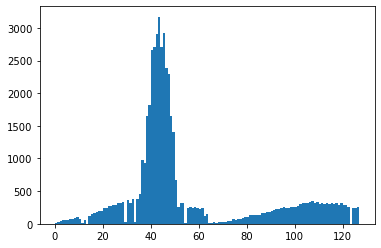

In [14]:
plt.hist(df['TDC_CHANNEL'], bins = len(df['TDC_CHANNEL'].unique()))
plt.show()

In [11]:
len(events)

670